<a href="https://colab.research.google.com/github/ruchising/LocalRepo/blob/main/Yet_another_copy_of_import_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import random
from PIL import Image, ImageEnhance


# keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam  # for using Adam optimizer
from tensorflow.keras.applications import VGG16  # for using VGG16 as a base model
from sklearn.utils import shuffle  # for shuffling the data


In [ ]:
#direction for training and testing data
train_dir = r'/content/drive/MyDrive/tumor_detection_using_deepLearning.ipybn/MRI Sample/Training'
test_dir= r'/content/drive/MyDrive/tumor_detection_using_deepLearning.ipybn/MRI Sample/Testing'
# load and shuffle the train data
train_path = []
train_labels =[]
# for label in os.listdir(train_dir):
#     print(label)

# for label in os.listdir(train_dir):
#     for image in os.listdir(os.path.join(train_dir,label)):
#         print(image)

for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir,label)):
        train_path.append(os.path.join(train_dir,label,image))
        train_labels.append(label)

train_path,train_labels = shuffle(train_path,train_labels)
# load and suffle the test data

test_path=[]
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir,label)):
        test_path.append(os.path.join(test_dir,label,image))
        test_labels.append(label)

test_path,test_labels = shuffle(test_path,test_labels)


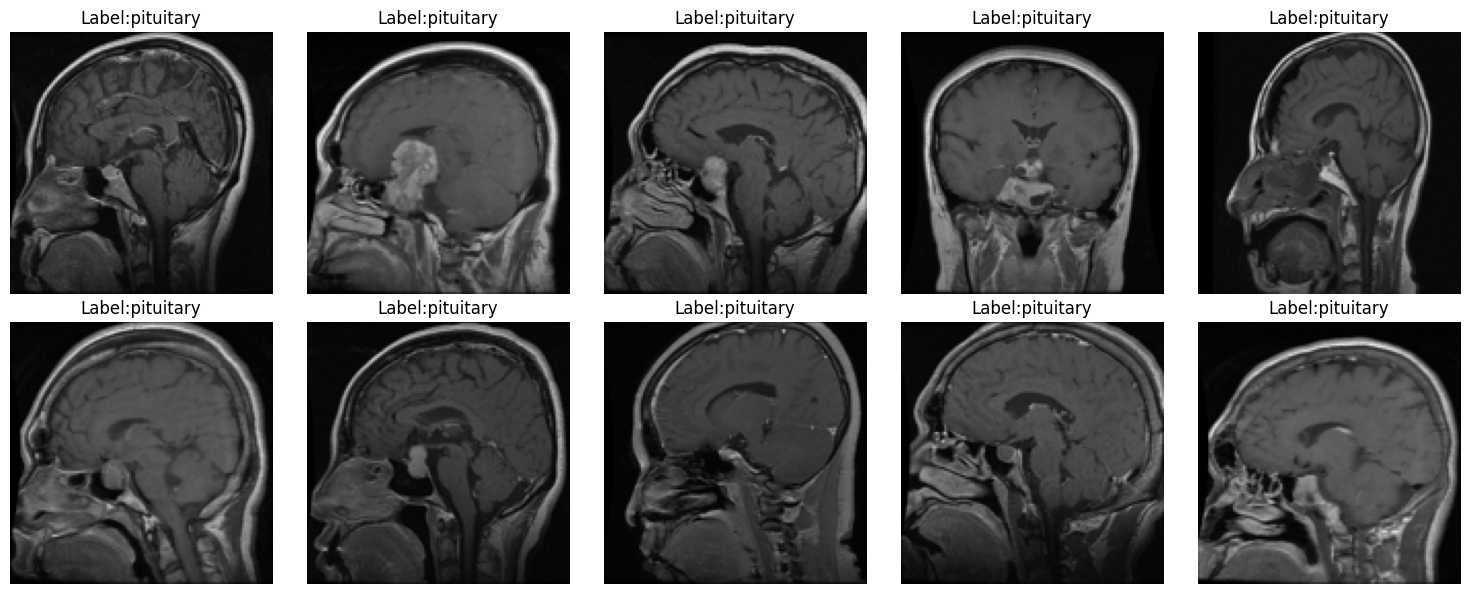

In [ ]:
import random
import matplotlib.pyplot as plt

# select random indicies for 10 images
random_indices = random.sample(range(len(train_path)),10)
# random_indices

# Create a figure to display images in 2 rows
fig, axes = plt.subplots(2,5,figsize=(15,6))
axes = axes.flatten()

# loop through the random indices and display images
for i, idx in enumerate(random_indices):
    img_path = train_path[idx]
    img = Image.open(img_path)
    img = img.resize((128,128))

    # display images
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Label:{train_labels[idx]}")

plt.tight_layout()
plt.show()



In [ ]:
# Image Augmentation function
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))  # Random brightness
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))  # Random contrast
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encoding labels (convert label names to integers)
def encode_label(labels):
    unique_labels = os.listdir(train_dir)  # Ensure unique labels are determined
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)

# Data generator for batching
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)  # Open and augment images
            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)  # Encode labels
            yield batch_images, batch_labels  # Yield the batch

In [ ]:
# Model architecture
IMAGE_SIZE = 128  # Image size (adjust based on your requirements)
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build the final model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))  # Input layer
model.add(base_model)  # Add VGG16 base model
model.add(Flatten())  # Flatten the output of the base model
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Parameters
batch_size = 20
steps = int(len(train_path) / batch_size)  # Steps per epoch
epochs = 5

# Train the model
history = model.fit(datagen(train_path, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - loss: 0.5463 - sparse_categorical_accuracy: 0.7449
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000


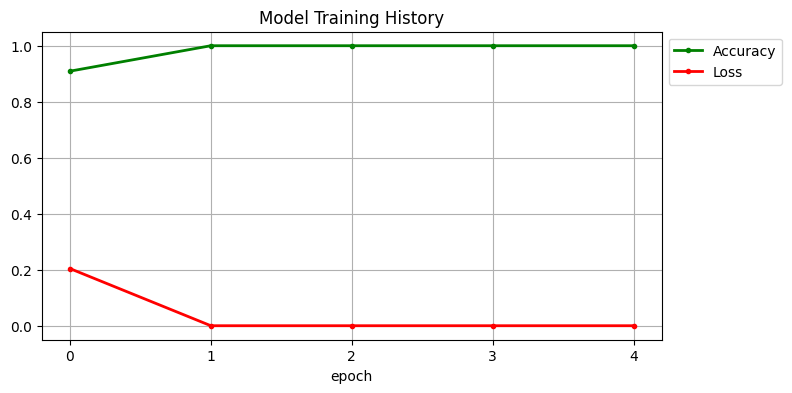

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Model Classificcation **report**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

# 1. Prediction on test data
test_images = open_images(test_path)  # Load and augment test images
test_labels_encoded = encode_label(test_labels)  # Encode the test labels

# Predict using the trained model
test_predictions = model.predict(test_images)

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))


4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



In [ ]:
import os
import shutil
import random
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import load_img, img_to_array

# Set paths
train_dir = '/content/drive/MyDrive/tumor_detection_using_deepLearning.ipybn/MRI Sample/Training'
test_dir = '/content/drive/MyDrive/tumor_detection_using_deepLearning.ipybn/MRI Sample/Testing'

# Image size
IMAGE_SIZE = 128

# 1. Create test folders and copy 20% images
split_ratio = 0.2
for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    class_test_path = os.path.join(test_dir, class_name)
    os.makedirs(class_test_path, exist_ok=True)

    images = [f for f in os.listdir(class_train_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)
    num_to_move = int(len(images) * split_ratio)

    for img in images[:num_to_move]:
        shutil.copy(os.path.join(class_train_path, img), os.path.join(class_test_path, img))

print("✅ Test images copied successfully.")

# 2. Image Augmentation
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    return np.array(image) / 255.0

# 3. Load and Augment Images
def open_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = img_to_array(img)
        img = augment_image(img)
        images.append(img)
    return np.array(images)

# 4. Encode Labels
def encode_label(labels, class_names):
    cleaned_labels = [label.strip().lower() for label in labels]
    return [class_names.index(label) for label in cleaned_labels]

# 5. Load test images and labels
test_path = []
test_labels = []

for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for image in os.listdir(label_path):
            if image.lower().endswith(('.jpg', '.jpeg', '.png')):
                test_path.append(os.path.join(label_path, image))
                test_labels.append(label)

print(f"✅ Loaded {len(test_path)} test images.")

# 6. Prediction and Evaluation
if len(test_path) == 0:
    print("❌ No test images found.")
else:
    class_names = sorted([d.strip().lower() for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

    test_images = open_images(test_path)
    test_labels_encoded = encode_label(test_labels, class_names)

    print("🔍 Predicting test images...")
    test_predictions = model.predict(test_images)

    # Fix for ValueError (only use present labels)
    predicted_labels = np.argmax(test_predictions, axis=1)
    used_labels = sorted(list(unique_labels(test_labels_encoded, predicted_labels)))
    used_class_names = [class_names[i] for i in used_labels]

    print("🧠 Classification Report:")
    print(classification_report(test_labels_encoded, predicted_labels, labels=used_labels, target_names=used_class_names))


✅ Test images copied successfully.
✅ Loaded 129 test images.
🔍 Predicting test images...
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step
🧠 Classification Report:
              precision    recall  f1-score   support

  meningioma       0.00      0.00      0.00       0.0
   pituitary       0.00      0.00      0.00     129.0

    accuracy                           0.00     129.0
   macro avg       0.00      0.00      0.00     129.0
weighted avg       0.00      0.00      0.00     129.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Confusion Matrix:
[[  0   0]
 [129   0]]


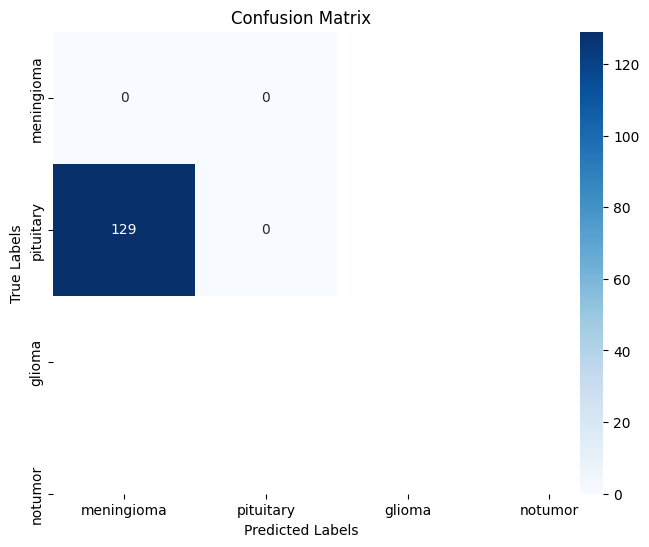

In [ ]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


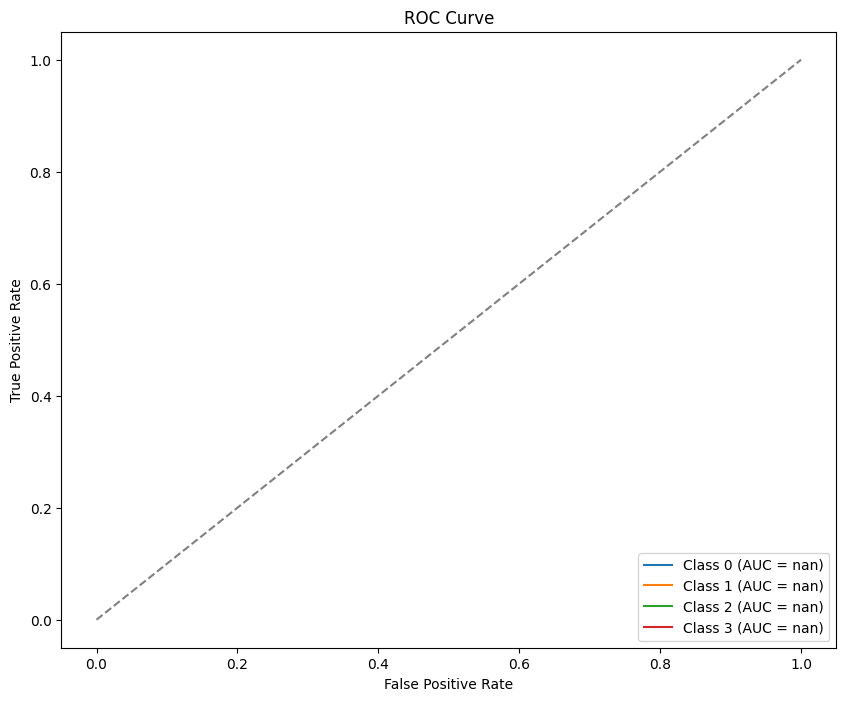

In [ ]:
# 4. ROC Curve and AUC
# Binarize the test labels and predictions for multi-class ROC
test_labels_bin = label_binarize(test_labels_encoded, classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bin = test_predictions  # The predicted probabilities for each class

# Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(os.listdir(train_dir))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(os.listdir(train_dir))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the entire model
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

# MRI TUMOR DETECTION **SYSTEM**

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma']

def detect_and_display(img_path, model, image_size=128):
    """
    Function to detect tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows the predicted tumor class and confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("❌ Error processing the image:", str(e))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


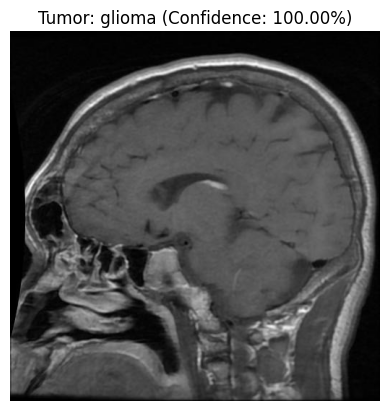

In [ ]:
image_path = 'D:\PYTHON(OOPS)\tumor_detection_using_deepLearning.ipybn\MRI Sample\Testing\meningioma\Te-me_0010.jpg'
detect_and_display(img_path, model)